In [18]:
#Transformada Inversa
p = []
fa = []
n = 0
valido = False

#Parametros de generador de aleatorios
xn = 790335
a = 25214903917 
m = 2 ** 48 - 1
c = 11

def ob_datos():
    global p , n, valido
    n = int(input("Tamaño Vector Probabilidades: "))
    if(n > 0):
        valido = True
    for i in range(n):
        x = input("P" + str(i)+": ")
        p.append(float(x))
        
def set_fa():
    global fa, valido
    x0 = p[0]
    fa.append(x0)
    for i in range(1,n):
        x0 = x0 + p[i]
        fa.append(x0)
    if(valido and fa[n-1] == 1):
        valido = True
    else:
        valido = False

def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv():
    u = 0
    i = 0
    va = [0]*n;
    cont = n;
    while cont>0 and valido:
        u = generar_aleatorio()
        i = buscarmayor(u)
        if(i != -1 and ((i+1) not in va)):
            if(u < fa[i]):
                cont-=1
                va[i] = i+1
                print(str(u) + " : " + str(i+1))
    
def buscarmayor(u):
    indice = -1
    for i in range(0,n):
        if(fa[i]-u >= 0.000000000000001):
            indice = i
            break
    return indice

if __name__ == "__main__":
    ob_datos()
    set_fa()
    transInv()

Tamaño Vector Probabilidades: 5
P0: 0.1
P1: 0.2
P2: 0.3
P3: 0.2
P4: 0.2
0.7992636508062276 : 4
0.4296681497788712 : 3
0.8694025250166884 : 5
0.06351650631512151 : 1
0.22491051002806808 : 2


In [8]:
#Transformada Inversa para generar variable aleatoria Poisson
import math
import time
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib inline

xn = datetime.now().microsecond
a = 25214903917 
m = 2 ** 48 - 1
c = 11

def ob_datos():
    global lb,k,valido
    k = int(input("k: "))
    lb = int(input(chr(955)+": "))
    if(k>0 and lb>0):
        p = math.exp(-lb)
        f = p
        i = 0
        valido = True
    
def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv():
    ct = k
    va = [0]*k
    uu = [0]*k
    if(valido):
        while ct>0:
            u = generar_aleatorio()
            i = 0
            p = math.exp(-lb)
            F = p
            ct1 = k
            while ct1 > 0:
                if((1-u)<0.0001):
                    ct = 0
                    break
                if(u<F):
                    if((i+1) not in va):
                        va[i] = i+1
                        uu[i] = u
                        ct-=1
                        print(str(u) + " : " + str(i))
                        break
                else:
                    p = lb*p/(i+1)
                    F = F + p
                    i += 1
                ct1-=1
        #graf(va,uu)

def graf(va,kk):
    
    pl.ylabel('P(X <= k)')
    pl.xlabel('K')
   
    pl.plot(va,kk,'ro',color="red")
    pl.grid(True)
    pl.axis([0,len(va),0,1])
    pl.show() 

if __name__ == "__main__":
    ob_datos()
    transInv()



k: 20
λ: 10
0.05240227826741536 : 5
0.5447754357760762 : 10
0.43556776341927317 : 9
0.9595601546881872 : 16
0.2805508290586839 : 8
0.6856508427138965 : 11
0.8673719576147607 : 14
0.022891666044000027 : 4
0.799512222062112 : 13
0.7633213386190922 : 12
0.07623343174764258 : 6
0.19945786569636043 : 7
0.9291306748055808 : 15
0.978369541981177 : 17
0.009529480030991556 : 3
0.9880304443854477 : 18
0.9928704249187454 : 19
0.0019725600707261107 : 2
3.2152990627310034e-05 : 0


N: 40
p: 0.5
0.546256271257752 : 15
0.8229068130938153 : 16
0.2560002626872562 : 14
0.07238520911004569 : 13
0.024142748571655746 : 12
0.0052924737757394005 : 11
0.0013435829207324493 : 10
1.8093155933485214e-05 : 7
0.00031113219486300745 : 9


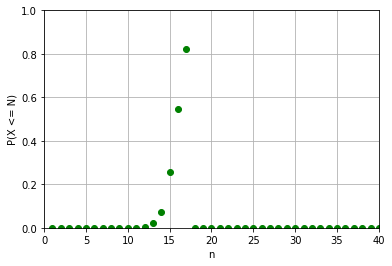

In [2]:
#Transformada Inversa para generar variable aleatoria binomial
import math
import time
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib inline

xn = datetime.now().microsecond
a = 25214903917 
m = 2 ** 48 - 1
c = 11

def ob_datos():
    global n,p,valido
    n = int(input("N: "))
    p = float(input("p: "))
    if(n>0 and p>0 and p<=1):
        valido = True
    
def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv():
    ct = n
    a = 1
    va = [0]*n
    uu = [0]*n
    if(valido):
        while ct>0:
            c = p/(1-p)
            i = 0
            pr = (1-p)**n
            F = pr
            u = generar_aleatorio()
            ct1 = n
            while ct1 > 0:
                if((1-u)<0.0001):
                    ct = 0
                    break
                if(u<F):
                    if((i+1) not in va):
                        va[i] = i+1
                        uu[i] = u
                        ct-=1
                        print(str(u) + " : " + str(i))
                        break
                else:
                    pr = (c*(n-1)/(i+1))*pr
                    F = F + pr
                    i += 1
                ct1-=1
        for i in range(n):
            va[i] = i+1
        #graf(va,uu)

def graf(va,kk):
    
    pl.ylabel('P(X <= N)')
    pl.xlabel('n')
   
    pl.plot(va,kk,'ro',color="green")
    pl.grid(True)
    pl.axis([0,len(va),0,1])
    pl.show() 

if __name__ == "__main__":
    ob_datos()
    transInv()

Tamaño Vector Probabilidades: 5
P0: 0.4
P1: 0.1
P2: 0.2
P3: 0.1
P4: 0.2
0.007123580362449669 : 2
0.0009373690859142448 : 5
0.015254006589565048 : 3
0.008634410836585036 : 1
0.0020884691074698554 : 4


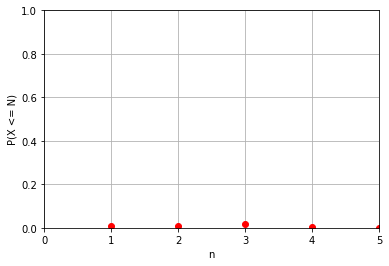

In [10]:
# Tecnica de aceptación y rechazo
#Transformada Inversa para generar variable aleatoria Poisson
import math
import time
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib inline

xn1 = datetime.now().microsecond
time.sleep(3)
xn2 = datetime.now().microsecond

a = 25214903917 
m = 2 ** 48 - 1
b = 11

def ob_datos():
    global p , n, valido, c, q
    my = 0
    n = int(input("Tamaño Vector Probabilidades: "))
    p = [None]*n
    if(n > 0):
        q = 1/n
        valido = True
        for i in range(n):
            x = float(input("P" + str(i)+": "))
            p[i] = x
            if(x>my):
                my = x
        c = round(my/q,2)
    
def generar_aleatorio(xn):
    xn = (a*xn + b) % m
    return (xn/m)

def tecAR():
    global xn1, xn2
    ct = n
    va = [0]*n
    uu = [0]*n
    if(valido):
        while ct>0:
            ct1 = n
            while ct1 > 0:
                u1 = generar_aleatorio(xn1)
                xn1 = u1*m
                y = int(n*u1) + 1
                u2 = generar_aleatorio(xn2)
                xn2 = u2*m
                py = 1/y
                fu = py/c*q
                if(u2<=fu):
                    if(y not in va):
                        va[y-1] = y
                        uu[y-1] = u2
                        ct-=1
                        print(str(u2) + " : " + str(y))
                        break
                ct1-=1
        graf(va,uu)

def graf(va,kk):
    
    pl.ylabel('P(X <= N)')
    pl.xlabel('n')
   
    pl.plot(va,kk,'ro',color="red")
    pl.grid(True)
    pl.axis([0,len(va),0,1])
    pl.show() 

if __name__ == "__main__":
    ob_datos()
    tecAR()


In [ ]:
# Tecnica de Composicion
#Transformada Inversa para generar variable aleatoria Poisson
import math
import time
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib inline

xn1 = datetime.now().microsecond
time.sleep(3)
xn2 = datetime.now().microsecond

a = 25214903917 
m = 2 ** 48 - 1
b = 11

def ob_datos():
    global p , n, valido
    my = 0
    n = int(input("Tamaño Vector Probabilidades: "))
    p = [None]*n
    if(n > 0):
        valido = True
        for i in range(n):
            x = float(input("P" + str(i)+": "))
            p[i] = x
    
def generar_aleatorio(xn):
    xn = (a*xn + b) % m
    return (xn/m)

def metCp():
    global xn1, xn2
    ct = n
    va = [0]*n
    uu = [0]*n
    if(valido):
        while ct>0:
            ct1 = n
            while ct1 > 0:
                u1 = generar_aleatorio(xn1)
                xn1 = u1*m
                u2 = generar_aleatorio(xn2)
                xn2 = u2*m
                if(u2<vl):
                    x = int(n*u2) + 1
                    if(x not in va):
                        va[y-1] = y
                        uu[y-1] = u2
                        ct-=1
                        print(str(u2) + " : " + str(y))
                        break
                else:
                    x = int((n/2)*u2) + int(n/2 +1)
                ct1-=1
        graf(va,uu)

def graf(va,kk):
    
    pl.ylabel('P(X <= N)')
    pl.xlabel('n')
   
    pl.plot(va,kk,'ro',color="red")
    pl.grid(True)
    pl.axis([0,len(va),0,1])
    pl.show() 

if __name__ == "__main__":
    ob_datos()
    metCp()